# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

In [178]:
# importation 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests as rq
import json
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import datetime


In [179]:
# Configuration
pd.set_option('display.max_columns', None)
%matplotlib inline
plt.rcParams.update({'font.size': 20})

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [180]:
df_twit_enhanced_data = pd.read_csv('twitter-archive-enhanced.csv')

In [181]:
df_twit_enhanced_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
541,806242860592926720,NaN,NaN,2016-12-06 21:04:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Dave. He's currently in...,7.833346e+17,4.196984e+09,2016-10-04 15:55:06 +0000,https://twitter.com/dog_rates/status/783334639...,12,10,Dave,None,None,None,None
1256,710588934686908417,NaN,NaN,2016-03-17 22:09:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beemo. He's a Chubberflop mix. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710588934...,12,10,Beemo,None,None,None,None
2225,668286279830867968,NaN,NaN,2015-11-22 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. Rusty's dreaming of a world where ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668286279...,11,10,Rusty,None,None,None,None
2323,666428276349472768,NaN,NaN,2015-11-17 01:30:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Austrian Pulitzer. Collectors ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666428276...,7,10,None,None,None,None,None
930,754449512966619136,NaN,NaN,2016-07-16 22:55:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [182]:
# I'll get file "image_predictions.tsv" by requests
result = rq.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [183]:
# I stock this result in a file "image_predictions.tsv"
if result.ok:
    # I decode result.content from byte to string
    content_result = result.content.decode('utf8')
    with open("image_predictions.tsv", 'w', encoding="utf8") as f:
        f.write(content_result)

In [184]:
# now I'm reding data from file "image_predictions.tsv"
df_prediction_data = pd.read_csv("image_predictions.tsv", sep="\t")

In [185]:
df_prediction_data.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1757,825147591692263424,https://pbs.twimg.com/media/C3ODWpfXAAAP1fb.jpg,1,Pekinese,0.354823,True,Pomeranian,0.245390,True,toy_poodle,0.136545,True
590,679148763231985668,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,Italian_greyhound,0.302685,True,hair_slide,0.124281,False,Afghan_hound,0.059846,True
1283,750429297815552001,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
1807,832397543355072512,https://pbs.twimg.com/media/C41FIiAW8AA7lMr.jpg,1,Pekinese,0.988916,True,Brabancon_griffon,0.001677,True,Siamese_cat,0.001126,False
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [186]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [187]:
tweet_ids = df_twit_enhanced_data.tweet_id.values
len(tweet_ids)

2356

In [188]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass
end = timer()

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 8841626705843773

348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 827324948884643840
383: 827228250799742977
384: 827199976799354881
385: 826958653328592898
386: 826848821049180160
387: 826615380357632002
388: 826598799820865537
389: 82659836527

691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 782722598790725632
727: 782598640137187329
728: 782305867769217024
729: 782021823840026624
730: 781955203444699136
731: 781661882474196992
732: 78165524921

1033: 745314880350101504
1034: 745074613265149952
1035: 745057283344719872
1036: 744995568523612160
1037: 744971049620602880
1038: 744709971296780288
1039: 744334592493166593
1040: 744234799360020481
1041: 744223424764059648
1042: 743980027717509120
1043: 743895849529389061
1044: 743835915802583040
1045: 743609206067040256
1046: 743595368194129920
1047: 743545585370791937
1048: 743510151680958465
1049: 743253157753532416
1050: 743222593470234624
1051: 743210557239623680
1052: 742534281772302336
1053: 742528092657332225
1054: 742465774154047488
1055: 742423170473463808
1056: 742385895052087300
1057: 742161199639494656
1058: 742150209887731712
1059: 741793263812808706
1060: 741743634094141440
1061: 741438259667034112
1062: 741303864243200000
1063: 741099773336379392
1064: 741067306818797568
1065: 740995100998766593
1066: 740711788199743490
1067: 740699697422163968
1068: 740676976021798912
1069: 740373189193256964
1070: 740365076218183684
1071: 740359016048689152
1072: 740214038584557568


1361: 703268521220972544
1362: 703079050210877440
1363: 703041949650034688
1364: 702932127499816960
1365: 702899151802126337
1366: 702684942141153280
1367: 702671118226825216
1368: 702598099714314240
1369: 702539513671897089
1370: 702332542343577600
1371: 702321140488925184
1372: 702276748847800320
1373: 702217446468493312
1374: 701981390485725185
1375: 701952816642965504
1376: 701889187134500865
1377: 701805642395348998
1378: 701601587219795968
1379: 701570477911896070
1380: 701545186879471618
1381: 701214700881756160
1382: 700890391244103680
1383: 700864154249383937
1384: 700847567345688576
1385: 700796979434098688
1386: 700747788515020802
1387: 700518061187723268
1388: 700505138482569216
1389: 700462010979500032
1390: 700167517596164096
1391: 700151421916807169
1392: 700143752053182464
1393: 700062718104104960
1394: 700029284593901568
1395: 700002074055016451
1396: 699801817392291840
1397: 699788877217865730
1398: 699779630832685056
1399: 699775878809702401
1400: 699691744225525762


1689: 681523177663676416
1690: 681340665377193984
1691: 681339448655802368
1692: 681320187870711809
1693: 681302363064414209
1694: 681297372102656000
1695: 681281657291280384
1696: 681261549936340994
1697: 681242418453299201
1698: 681231109724700672
1699: 681193455364796417
1700: 680970795137544192
1701: 680959110691590145
1702: 680940246314430465
1703: 680934982542561280
1704: 680913438424612864
1705: 680889648562991104
1706: 680836378243002368
1707: 680805554198020098
1708: 680801747103793152
1709: 680798457301471234
1710: 680609293079592961
1711: 680583894916304897
1712: 680497766108381184
1713: 680494726643068929
1714: 680473011644985345
1715: 680440374763077632
1716: 680221482581123072
1717: 680206703334408192
1718: 680191257256136705
1719: 680176173301628928
1720: 680161097740095489
1721: 680145970311643136
1722: 680130881361686529
1723: 680115823365742593
1724: 680100725817409536
1725: 680085611152338944
1726: 680070545539371008
1727: 680055455951884288
1728: 679877062409191424


2017: 672169685991993344
2018: 672160042234327040
2019: 672139350159835138
2020: 672125275208069120
2021: 672095186491711488
2022: 672082170312290304
2023: 672068090318987265
2024: 671896809300709376
2025: 671891728106971137
2026: 671882082306625538
2027: 671879137494245376
2028: 671874878652489728
2029: 671866342182637568
2030: 671855973984772097
2031: 671789708968640512
2032: 671768281401958400
2033: 671763349865160704
2034: 671744970634719232
2035: 671743150407421952
2036: 671735591348891648
2037: 671729906628341761
2038: 671561002136281088
2039: 671550332464455680
2040: 671547767500775424
2041: 671544874165002241
2042: 671542985629241344
2043: 671538301157904385
2044: 671536543010570240
2045: 671533943490011136
2046: 671528761649688577
2047: 671520732782923777
2048: 671518598289059840
2049: 671511350426865664
2050: 671504605491109889
2051: 671497587707535361
2052: 671488513339211776
2053: 671486386088865792
2054: 671485057807351808
2055: 671390180817915904
2056: 671362598324076544


2346: 666063827256086533
2347: 666058600524156928
2348: 666057090499244032
2349: 666055525042405380
2350: 666051853826850816
2351: 666050758794694657
2352: 666049248165822465
2353: 666044226329800704
2354: 666033412701032449
2355: 666029285002620928
2356: 666020888022790149


In [189]:
# i use tweet-json.txt beacause twitter not allow me to use her API
# i send request tree time always not provod
result_tweet = rq.get("https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt")
result_tweet.ok

True

In [190]:
if result_tweet.ok:
    # I decode result_tweet.content from byte to string
    with open("tweet-json.txt", 'w', encoding="utf8") as f:
        f.write(result_tweet.content.decode('utf8'))

In [191]:
# i read file tweet-json.txt and I convert data from string to json, then I stock data in list  
data_tweet = []
with open("tweet-json.txt", 'r', encoding="utf8") as f:
    lines_file = f.readlines()
    for line in lines_file:
        twet = json.loads(line)
        data_tweet.append({'tweet_id': twet['id'],'retweets': twet['retweet_count'],'favourites': twet['favorite_count']})                


In [192]:
# i create a data frame from list data_tweet
df_tweets_data = pd.DataFrame(data_tweet, columns=['tweet_id', 'retweets', 'favourites'])
df_tweets_data.sample(2)

,tweet_id,retweets,favourites
544,805826884734976000,2132,7335
712,784183165795655680,9374,22513


In [193]:
df_tweets_data.columns

Index(['tweet_id', 'retweets', 'favourites'], dtype='object')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

<h5>1- Dataset Twitter</h5>

In [194]:
df_tweets_data.sample(5)

,tweet_id,retweets,favourites
1487,692905862751522816,998,2683
1141,727314416056803329,834,3623
1680,681891461017812993,951,2706
488,813910438903693312,2194,10342
1371,701981390485725185,1106,3755


In [195]:
df_tweets_data.shape

(2354, 3)

In [196]:
df_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id      2354 non-null int64
retweets      2354 non-null int64
favourites    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [197]:
df_tweets_data.duplicated().sum()

0

<h5>2- Dataset twitter archive enhanced</h5>

In [198]:
df_twit_enhanced_data.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
1463,694669722378485760,NaN,NaN,2016-02-02 23:52:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's an important dog. Can contr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
455,818307523543449600,NaN,NaN,2017-01-09 04:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Moose. He doesn't want his...,8.164506e+17,4.196984e+09,2017-01-04 01:05:59 +0000,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None
1547,689280876073582592,NaN,NaN,2016-01-19 02:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He wants you to know he could ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689280876...,10,10,Herald,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
719,783391753726550016,NaN,NaN,2016-10-04 19:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Godi. He's an avid beachgoer and part tim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783391753...,13,10,Godi,None,None,None,None
1163,723673163800948736,NaN,NaN,2016-04-23 00:41:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ivar. She is a badass Viking warrior. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723673163...,10,10,Ivar,None,None,None,None
2325,666418789513326592,NaN,NaN,2015-11-17 00:53:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,None,None,None


<h7>Évaluation : évaluation visuelle</h7>
- les valeurs manqunates dans plusieurs colonnes et lignes
- la colonne source contient une balise HTML

<h7>Évaluation : programatiques</h7>

In [199]:
# on va afficher les elements unique de la colonne source
df_twit_enhanced_data.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [200]:
# afficher les informations du Dataframe
df_twit_enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<h7>Évaluation programmatique</h7>
- les valeurs manquantes
- les colonnes timestamp et retweeted_status_timestamp de type object

In [201]:
# pour voir si il y a des elements dupliquer ou pas
df_twit_enhanced_data.duplicated().sum()

0

In [202]:
# le nombre d'element unique dans la colonne *expanded_urls*
df_twit_enhanced_data.expanded_urls.nunique()

2218

In [203]:
# le nombre d'element unique dans la colonne *tweet_id*
df_twit_enhanced_data.tweet_id.nunique()

2356

In [204]:
# la colonne expanded_urls a multiple url 
df_twit_enhanced_data.expanded_urls[441]

'https://twitter.com/dog_rates/status/819711362133872643/photo/1,https://twitter.com/dog_rates/status/819711362133872643/photo/1'

In [205]:
# le nombre de valeurs null dans la colonne expanded_urls
df_twit_enhanced_data.expanded_urls.isnull().sum()

59

In [206]:
# pour verifier si tous les nom du chient commencent par un litre majuscul
df_twit_enhanced_data.name.str.match('[A-Z]').all() 

False

In [207]:
df_twit_enhanced_data.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
an             7
Toby           7
Buddy          7
Bailey         7
Jack           6
Jax            6
Milo           6
Oscar          6
Dave           6
Scout          6
Rusty          6
Leo            6
Bella          6
Koda           6
Stanley        6
Louis          5
            ... 
Harvey         1
Oddie          1
Henry          1
Monster        1
Oreo           1
Reptar         1
Shnuggles      1
Tater          1
Barney         1
Franq          1
Rose           1
Tino           1
Mairi          1
Ivar           1
Grady          1
Boots          1
Orion          1
Kane           1
Tanner         1
Lizzie         1
Crawford       1
Laela          1
Mark           1
Gilbert        1
Gunner         1
Nigel          1
Vinnie         1
Darrel        

In [208]:
# il ya des chient qui nommee "a"
df_twit_enhanced_data.iloc[2128]

tweet_id                                                     670303360680108032
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-27 18:09:09 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is a Speckled Cauliflower Yosemite named ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/670303360...
rating_numerator                                                              9
rating_denominator                                                           10
name                                    

In [209]:
df_twit_enhanced_data.iloc[2128]['text']

"This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN"

In [210]:
df_twit_enhanced_data.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

<h7>Évaluation programmatique</h7>
- la colonne name contient la valeur 'a' comme nom
- plusieurs lien dans la colonne expanded_urls
- pour les quatres colonnes floofer, doggo, pupper et puppo sont du type object 

<h5>3 Dataset image predictions</h5>

In [211]:
df_prediction_data.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
271,670823764196741120,https://pbs.twimg.com/media/CU8-puBWwAAR8Xl.jpg,1,Labrador_retriever,0.947453,True,German_short-haired_pointer,0.017001,True,Weimaraner,0.015432,True
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
898,699779630832685056,https://pbs.twimg.com/media/CbYd3C9WEAErJ4Z.jpg,1,malinois,0.706038,True,German_shepherd,0.165655,True,Great_Dane,0.059048,True
569,678389028614488064,https://pbs.twimg.com/media/CWofOHUWUAACGVa.jpg,1,miniature_pinscher,0.516284,True,kelpie,0.227402,True,vizsla,0.103246,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
1953,863907417377173506,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,1,marmot,0.358828,False,meerkat,0.174703,False,weasel,0.123485,False
1365,761599872357261312,https://pbs.twimg.com/media/CpG_CrlWYAYyuP3.jpg,1,Gordon_setter,0.240427,True,Saluki,0.224269,True,Doberman,0.129730,True
924,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_white_terrier,0.769159,True,Scotch_terrier,0.064369,True,Old_English_sheepdog,0.043763,True
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False


- les noms dans les colonnes p1 et p2 ne commencent pas par litre majuscule

In [212]:
df_prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [213]:
# si on a des elements dupliquees ou pas de le jeu de donnee
df_prediction_data.duplicated().sum()

0

In [214]:
# verifier l'unicite tweet_id
df_prediction_data.duplicated('tweet_id').sum()

0

In [215]:
# les urls dupliquees 
df_prediction_data[df_prediction_data.duplicated('jpg_url')].jpg_url.value_counts()

https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            1
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            1
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            1
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            1
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            1
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            1
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            1
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                                            1
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            1
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            1
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                       

In [216]:
# exemple la meme url dans deux tweet
df_prediction_data.query('jpg_url == "https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg"')  

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1791,830583320585068544,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


<h7>Évaluation programmatique</h7>
- les memes donnees dupliquee avec des tweet_id different

### Quality issues
1. les mêmes données dupliquées avec différents tweet_id (data set "df_prediction")
2. les noms dans les colonnes p1 et p2 ne commencent pas par un litre en majuscule (data set "df_prediction")
3. les noms dans les colonnes p1 et p2 contient _ au lieu d'espace
4. les valeurs manquantes dans plusieurs colonnes et lignes
5. la colonne source contient une balise HTML
6. les colonnes timestamp et retweeted_status_timestamp de type object
7. la colonne name contient la valeur 'a' comme nom
8. plusieurs lien dans la colonne expanded_urls
9. pour les quatres colonnes floofer, doggo, pupper et puppo sont du type object 
10. pour la colonne "timestamp" il est très difficile de travailler avec ce format nous travaillerons juste avec l'année et le mois (j'ai détecté ce problème dans la partie visualisation)

11. Il y a des noms de colonne que ne sont pas de sens

### Tidiness issues
1. tweet_id existe dans les trois tables (on peut concatener les trois tables)
2. la colonne expanded_urls n'a pas de sens apres merge de donne


In [217]:
### copier de donnee
df_prediction = df_prediction_data.copy()
df_twit_enhanced = df_twit_enhanced_data.copy()
df_tweets = df_tweets_data.copy()

## Cleaning Data


## Data set image prediction

In [218]:
df_prediction.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Issue #1: les noms dans les colonnes p1 et p2 ne commencent pas par un litre en majuscule et les noms dans les colonnes p1 et p2 contient _ au lieu d'espace

#### Define: on va reformater les valeurs dans les colonnes p1 et p2

#### Code

In [219]:
# change le premier litre en majuscule
df_prediction['p1'] = df_prediction.p1.str.title().str.replace('_', ' ')
df_prediction['p2'] = df_prediction.p2.str.title().str.replace('_', ' ')
df_prediction['p3'] = df_prediction.p3.str.title().str.replace('_', ' ')

#### Test

In [220]:
# Test
df_prediction['p1'].str.match('[A-Z]').all(), df_prediction['p2'].str.match('[A-Z]').all()

(True, True)

In [221]:
df_prediction['p1'].head(2)

0    Welsh Springer Spaniel
1                   Redbone
Name: p1, dtype: object

### Issue #2: les mêmes données dupliquées avec différents tweet_id

#### Define on va supprimer les donnees dupliquees

#### Code

In [222]:
# On va supprimer toutes les lignes dupliquees
index_data_duplicated = df_prediction[df_prediction.duplicated('jpg_url')].index
df_prediction.drop(index_data_duplicated, inplace = True)

#### Test

In [223]:
df_prediction[df_prediction.duplicated('jpg_url')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [224]:
df_prediction.query('jpg_url == "https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg"')  

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1791,830583320585068544,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador Retriever,0.908703,True,Seat Belt,0.057091,False,Pug,0.011933,True


## Dataset twitter archive enhanced

In [225]:
df_twit_enhanced.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue #3: la colonne source contient une balise HTML

#### Define on va extraire le lien et le titre de la source et on va les stocker dans DataFrame

#### Code

In [226]:
df_twit_enhanced.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [227]:
df_clean_url = df_twit_enhanced.source.str.extractall(r'(href=".*?")').reset_index()
df_clean_url.head(1)

,level_0,match,0
0,0,0,"href=""http://twitter.com/download/iphone"""


In [228]:
df_clean_url.rename(columns={'level_0': 'level_0', 'match': 'match', 0: 'href'}, inplace = True)

In [229]:
df_clean_url['href'] = df_clean_url.href.str.replace('href="', '').str.replace('"', '')
df_clean_url.head(2)

,level_0,match,href
0,0,0,http://twitter.com/download/iphone
1,1,0,http://twitter.com/download/iphone


In [230]:
df_clean_titre = df_twit_enhanced.source.str.extractall(r'(>.*?<)').reset_index()
df_clean_titre.rename(columns={0: 'titre'}, inplace=True)
df_clean_titre['titre'] = df_clean_titre.titre.str.replace('>', '').str.replace('<', '')
df_clean_titre.head(2)

,level_0,match,titre
0,0,0,Twitter for iPhone
1,1,0,Twitter for iPhone


In [231]:
df_twit_enhanced.drop('source', inplace=True, axis=1)
df_twit_enhanced['url_source'], df_twit_enhanced['title_source'] = df_clean_url.href, df_clean_titre.titre

### Test

In [232]:
df_twit_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_source,title_source
2141,669993076832759809,NaN,NaN,2015-11-26 21:36:12 +0000,This is Zoey. Her dreams of becoming a hippo b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669993076...,9,10,Zoey,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,This is by far the most coordinated series of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680085611...,12,10,by,None,None,None,None,https://about.twitter.com/products/tweetdeck,TweetDeck
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None,http://twitter.com/download/iphone,Twitter for iPhone
2044,671533943490011136,NaN,NaN,2015-12-01 03:39:03 +0000,Super rare dog here. Spiffy mohawk. Sharp mout...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671533943...,6,10,None,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone


### Issue 4: les colonnes timestamp et retweeted_status_timestamp de type object

#### Define On va convertir le type de timestamp et retweeted_stsus_timestamp a type DateTime

### Code

In [233]:
# on va changer le type 
df_twit_enhanced['timestamp'] = pd.to_datetime(df_twit_enhanced['timestamp'])
df_twit_enhanced['retweeted_status_timestamp'] = pd.to_datetime(df_twit_enhanced['retweeted_status_timestamp'])

### Test

In [234]:
df_twit_enhanced.select_dtypes('datetime').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
timestamp                     2356 non-null datetime64[ns]
retweeted_status_timestamp    181 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 36.9 KB


### Issue 5: la colonne name contient la valeur 'a' comme nom

#### Define: On va extraire le nom du chient dans le text s'il existe

### Code

In [235]:
# on va prendre le nom du chient dans le text s'il existe 
df_name_dog = df_twit_enhanced.query('name == "a"').text.str.extractall('(named.*)').reset_index().rename(columns={0:'name'})
df_name_dog

,level_0,match,name
0,1853,0,named Wylie. Lovable eyes. Chiller as hell. 10...
1,1955,0,named Kip. Big fan of bed n breakfasts. Fits p...
2,2034,0,named Jacob (Yacōb). Loves to sit in swing. St...
3,2066,0,named Rufus. This time Rufus will be ready for...
4,2116,0,named Spork. Only 1 ear works. No seat belt. I...
5,2125,0,named Cherokee. Just got destroyed by a snowba...
6,2128,0,named Hemry. He's terrified of intruder dog. N...
7,2146,0,named Alphred. He can't wait for the Turkey. 1...
8,2161,0,named Alfredo. Loves to cuddle with smaller we...
9,2191,0,named Leroi. Likes to skip on roofs. Good trac...


In [236]:
# on va creer un colonne qui contient le nom du chient
df_name_dog['name_dog'] = df_name_dog.name.apply(lambda x: x.split()[1])
df_name_dog

,level_0,match,name,name_dog
0,1853,0,named Wylie. Lovable eyes. Chiller as hell. 10...,Wylie.
1,1955,0,named Kip. Big fan of bed n breakfasts. Fits p...,Kip.
2,2034,0,named Jacob (Yacōb). Loves to sit in swing. St...,Jacob
3,2066,0,named Rufus. This time Rufus will be ready for...,Rufus.
4,2116,0,named Spork. Only 1 ear works. No seat belt. I...,Spork.
5,2125,0,named Cherokee. Just got destroyed by a snowba...,Cherokee.
6,2128,0,named Hemry. He's terrified of intruder dog. N...,Hemry.
7,2146,0,named Alphred. He can't wait for the Turkey. 1...,Alphred.
8,2161,0,named Alfredo. Loves to cuddle with smaller we...,Alfredo.
9,2191,0,named Leroi. Likes to skip on roofs. Good trac...,Leroi.


In [237]:
# on va change le nom du chient
for ligne in df_name_dog[['level_0', 'name_dog']].values:
    df_twit_enhanced.at[ligne[0], 'name'] = ligne[1].replace('.', '') 

### Test

In [238]:
df_twit_enhanced.iloc[1853]['text']

"This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI"

In [239]:
df_twit_enhanced.iloc[1853]['name']

'Wylie'

### Issue #6: plusieurs lien dans la colonne expanded_urls

#### Define On va garder just un seul lien dans la column expanded_urls

### Code

In [240]:
# split la valeur par ',' et on prend juste la premiere valeur
df_twit_enhanced['expanded_urls'] = df_twit_enhanced.expanded_urls.apply(lambda x: str(x).split(',')[0])

### Test 

In [241]:
# Pour tester si la colonne expanded_urls contient juste un seul lien
(df_twit_enhanced['expanded_urls'].str.find(',') == -1).all()

True

### Issue #7: pour les quatres colonnes floofer, doggo, pupper et puppo sont du type object 

#### Define On va modifier les valeurs dans les colonnes par des valeurs booleanne

### Code

In [242]:
# on va remplacer les valeurs dans les colonnes par True s'il existe une valeur et False par None
df_twit_enhanced['floofer'] = df_twit_enhanced.floofer.apply(lambda x: True if x == 'floofer' else False)
df_twit_enhanced['doggo'] = df_twit_enhanced.doggo.apply(lambda x: True if x == 'doggo' else False)
df_twit_enhanced['pupper'] = df_twit_enhanced.pupper.apply(lambda x: True if x == 'pupper' else False)
df_twit_enhanced['puppo'] = df_twit_enhanced.puppo.apply(lambda x: True if x == 'puppo' else False)


### Test

In [243]:
df_twit_enhanced.puppo.unique()

array([False,  True], dtype=bool)

### Issue #8: les valeurs manquantes 

#### Define on va garder les tweets originaux et on va supprimer les retweet

In [244]:
df_twit_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null bool
floofer                       2356 non-null bool
pupper                        2356 non-null bool
puppo                         2356 non-null bool
url_source                    2356 non-null object
title_source            

In [245]:
# supprission des valeurs manquantes
df_twit_enhanced = df_twit_enhanced[df_twit_enhanced.retweeted_status_id.isnull()]

### Test

In [246]:
df_twit_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null bool
floofer                       2175 non-null bool
pupper                        2175 non-null bool
puppo                         2175 non-null bool
url_source                    2175 non-null object
title_source                  

### Issue #9 : pour la colonne "timestamp" il est très difficile de travailler avec ce format nous travaillerons juste avec l'année et le mois (j'ai détecté ce problème dans la partie visualisation)

#### Define On va creer un autre colonne qui s'appelle time et on va stocker dans cette colonne juste time "Year"

### Code 

In [247]:
df_twit_enhanced['year'] = df_twit_enhanced.timestamp.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").year)
df_twit_enhanced['year'] = df_twit_enhanced['year'].astype('int', errors='ignore')

### Test

In [248]:
df_twit_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null bool
floofer                       2175 non-null bool
pupper                        2175 non-null bool
puppo                         2175 non-null bool
url_source                    2175 non-null object
title_source                  

In [249]:
df_twit_enhanced['year'].head(2)

0    2017
1    2017
Name: year, dtype: int64

### Issue #10: les noms des colonnes

#### Define On va renommer quelques colonnes

### Code

In [250]:
# on va renommer les colonnes
columns={"p1": "picture1", "p1_conf": "picture1_confidence", "p1_dog": "picture1_dog"
        ,"p2": "picture2", "p2_conf": "picture2_confidence", "p2_dog": "picture2_dog",
        "p3": "picture3", "p3_conf": "picture3_confidence", "p3_dog": "picture3_dog"}
df_prediction.rename(columns=columns, inplace=True)

### Test

In [251]:
df_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'picture1', 'picture1_confidence',
       'picture1_dog', 'picture2', 'picture2_confidence', 'picture2_dog',
       'picture3', 'picture3_confidence', 'picture3_dog'],
      dtype='object')

## Tidiness

### Issue #1 : tweet_id existe dans les trois tables (on peut concatener les trois tables)

#### Define On va merger les donnees par tweet_id

### Code

In [252]:
# on veut merger les donnees
twitter_archive_master = pd.merge(left=df_twit_enhanced,right=df_prediction,on ='tweet_id',how='left')

In [253]:
twitter_archive_master = pd.merge(left=twitter_archive_master,right=df_tweets,on ='tweet_id',how='left')

### Test

In [254]:
twitter_archive_master.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_source,title_source,year,jpg_url,img_num,picture1,picture1_confidence,picture1_dog,picture2,picture2_confidence,picture2_dog,picture3,picture3_confidence,picture3_dog,retweets,favourites
584,782969140009107456,NaN,NaN,2016-10-03 15:42:44,This is Cali. She arrived preassembled. Conven...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/782969140...,12,10,Cali,False,False,False,False,http://twitter.com/download/iphone,Twitter for iPhone,2016,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1.0,Seat Belt,0.474292,False,Golden Retriever,0.171393,True,Labrador Retriever,0.110592,True,8521,26949
1100,708845821941387268,NaN,NaN,2016-03-13 02:43:08,Here's a pupper with magic eyes. Not wearing a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/708845821...,9,10,None,False,False,True,False,http://twitter.com/download/iphone,Twitter for iPhone,2016,https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg,1.0,Schipperke,0.745640,True,Kelpie,0.167853,True,Boston Bull,0.014763,True,1015,3226


### Issue 2# : La supprission du colonne expanded_urls

#### Define On n'a pas besion la colonne expanded_urls

### Code

In [255]:
# Supprission de la colonne
twitter_archive_master.drop('expanded_urls', axis=1, inplace=True)

### Test

In [256]:
twitter_archive_master.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_source,title_source,year,jpg_url,img_num,picture1,picture1_confidence,picture1_dog,picture2,picture2_confidence,picture2_dog,picture3,picture3_confidence,picture3_dog,retweets,favourites
1223,699423671849451520,NaN,NaN,2016-02-16 02:42:52,"""Don't ever talk to me or my son again."" ...bo...",NaN,NaN,NaT,10,10,None,False,False,False,False,http://twitter.com/download/iphone,Twitter for iPhone,2016,https://pbs.twimg.com/media/CbTaHrRW0AABXmG.jpg,1.0,Pug,0.997860,True,French Bulldog,0.001825,True,Bull Mastiff,0.000299,True,383,1505
1621,676975532580409345,NaN,NaN,2015-12-16 04:01:59,This is Cooper. He doesn't know how cheese wor...,NaN,NaN,NaT,11,10,Cooper,False,False,False,False,http://twitter.com/download/iphone,Twitter for iPhone,2015,https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg,1.0,Malamute,0.363257,True,Siberian Husky,0.245862,True,Eskimo Dog,0.125547,True,1203,3015


In [257]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 31 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null bool
floofer                       2175 non-null bool
pupper                        2175 non-null bool
puppo                         2175 non-null bool
url_source                    2175 non-null object
title_source                  2175 non-null object
year                          

### Supprimez les colonnes sont vides 

#### Define On va supprimer les valeurs les colonnes qui ne contiennet pas des infos sur les tweets

In [258]:
twitter_archive_master = twitter_archive_master.drop(["retweeted_status_id","retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)


### Test

In [259]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 28 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null bool
floofer                  2175 non-null bool
pupper                   2175 non-null bool
puppo                    2175 non-null bool
url_source               2175 non-null object
title_source             2175 non-null object
year                     2175 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
picture1                 1994 non-null object
picture1_confidence      1994 non-null float64
picture1_dog           

## Exploration dataset twitter_archive_master

In [260]:
twitter_archive_master.shape

(2175, 28)

In [261]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 28 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null bool
floofer                  2175 non-null bool
pupper                   2175 non-null bool
puppo                    2175 non-null bool
url_source               2175 non-null object
title_source             2175 non-null object
year                     2175 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
picture1                 1994 non-null object
picture1_confidence      1994 non-null float64
picture1_dog           

In [262]:
twitter_archive_master['in_reply_to_status_id'].sample(10)

1411   NaN
1412   NaN
120    NaN
1618   NaN
959    NaN
2143   NaN
1602   NaN
75     NaN
1126   NaN
98     NaN
Name: in_reply_to_status_id, dtype: float64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [263]:
# on va sauvegarder les dataframe en des fichiers csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)
df_twit_enhanced.to_csv('df_twit_enhanced_clean.csv', index=False)
df_prediction.to_csv('df_prediction_clean.csv', index=False)
df_tweets.to_csv('df_tweets_clean.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### In this section I will analyze and visualize this data *twitter_archive_master.csv*

- Evolution des retweets et favourites par le temps,
- quelle sont les chiens qui ont beaucoup de retweets, favourites les races ou les non races?
- quelles sont les etapes du chein les plus de retweets et favourites


In [264]:
# apres le traitement on va creer une dataframe df
df = pd.read_csv('twitter_archive_master.csv')

In [265]:
df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_source,title_source,year,jpg_url,img_num,picture1,picture1_confidence,picture1_dog,picture2,picture2_confidence,picture2_dog,picture3,picture3_confidence,picture3_dog,retweets,favourites
1215,700002074055016451,NaN,NaN,2016-02-17 17:01:14,This is Thumas. He covered himself in nanners ...,9,10,Thumas,False,False,False,False,http://twitter.com/download/iphone,Twitter for iPhone,2016,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,1.0,Chihuahua,0.369488,True,Schipperke,0.243367,True,Pug,0.161614,True,1529,3627
1461,684147889187209216,NaN,NaN,2016-01-04 23:02:22,This is Sweets the English Bulldog. Waves back...,12,10,Sweets,False,False,True,False,http://vine.co,Vine - Make a Scene,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1703,3265


In [266]:
df.shape

(2175, 28)

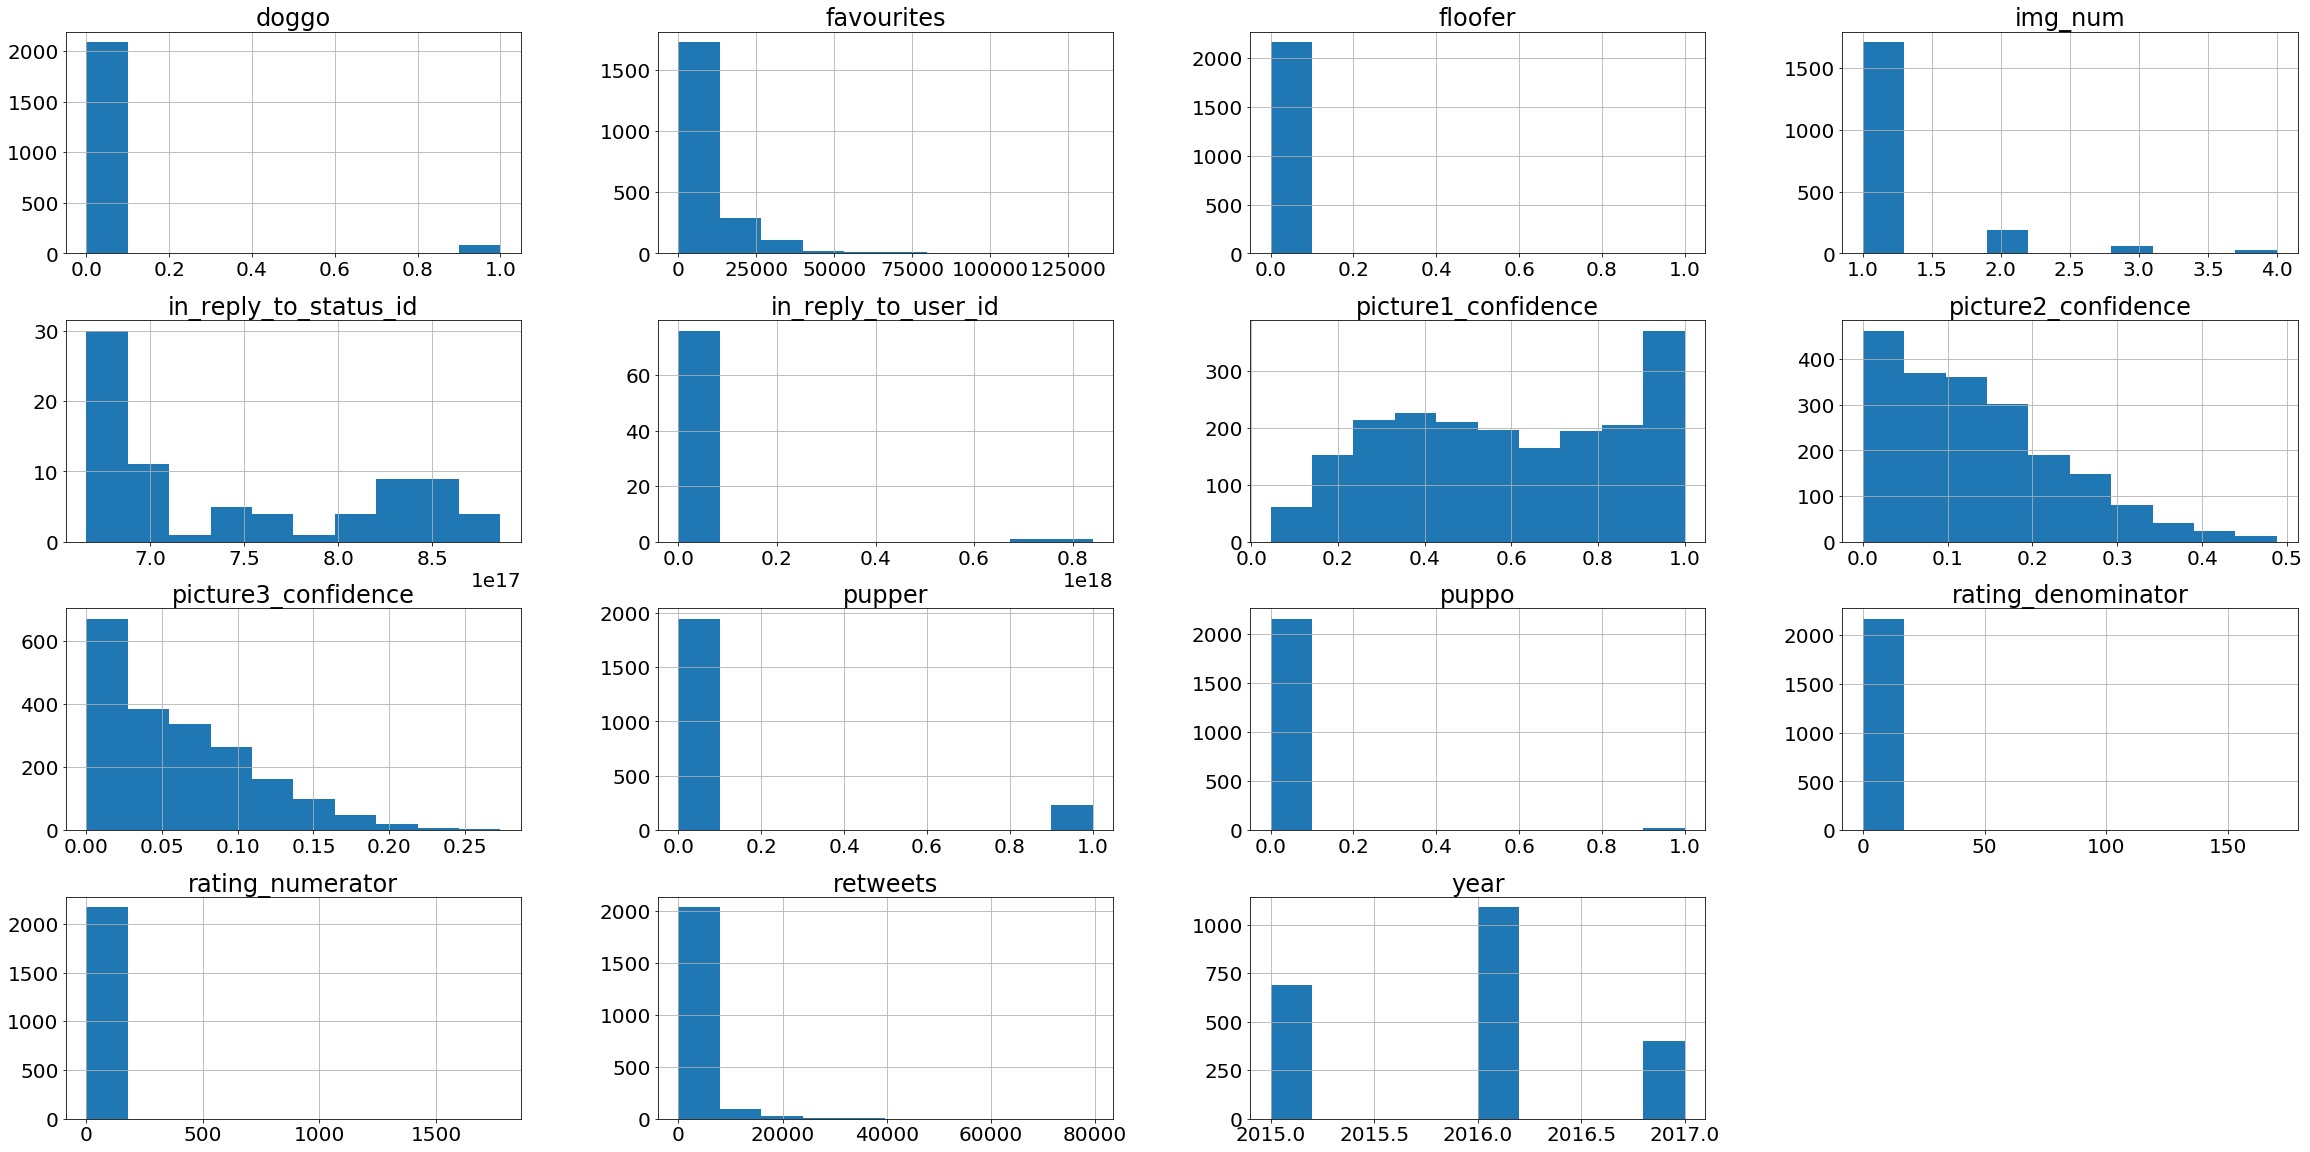

In [267]:
# pour visualiser tous les champs du type nemuric
df.drop('tweet_id', axis=1).hist(figsize=[40, 20]);

In [268]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'url_source', 'title_source', 'year',
       'jpg_url', 'img_num', 'picture1', 'picture1_confidence', 'picture1_dog',
       'picture2', 'picture2_confidence', 'picture2_dog', 'picture3',
       'picture3_confidence', 'picture3_dog', 'retweets', 'favourites'],
      dtype='object')

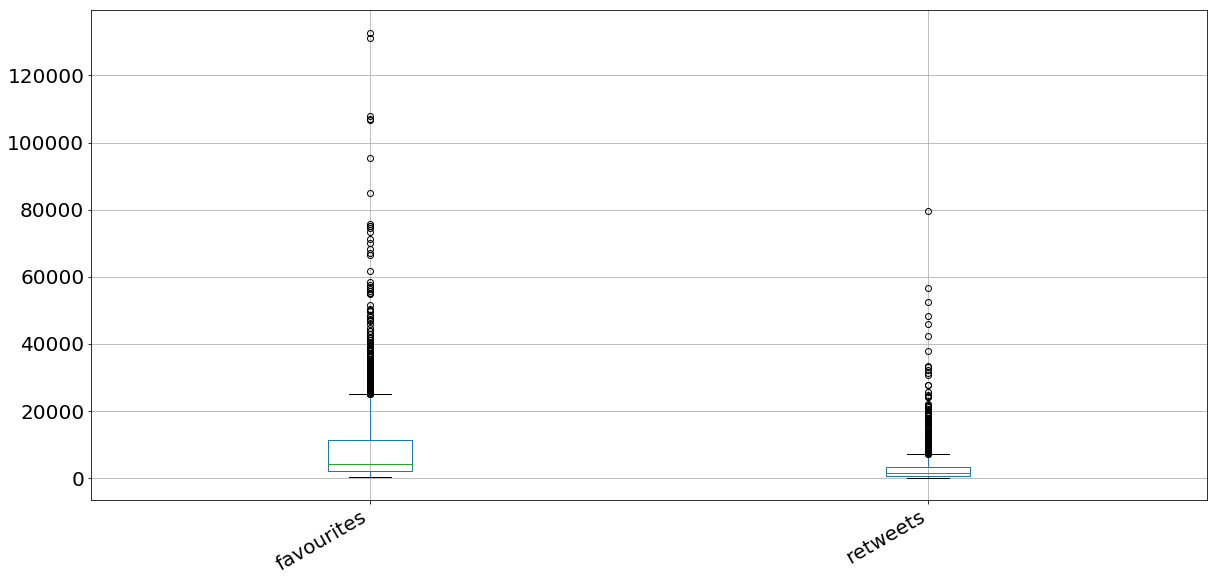

In [269]:
# box plot pour les colonnes favourite et retweet
fig, axs = plt.subplots(1,1,figsize=(20,  10)); 
df.boxplot(['favourites', 'retweets']);
fig.autofmt_xdate()

- les deux colonnes contiennet des valeurs manquantes

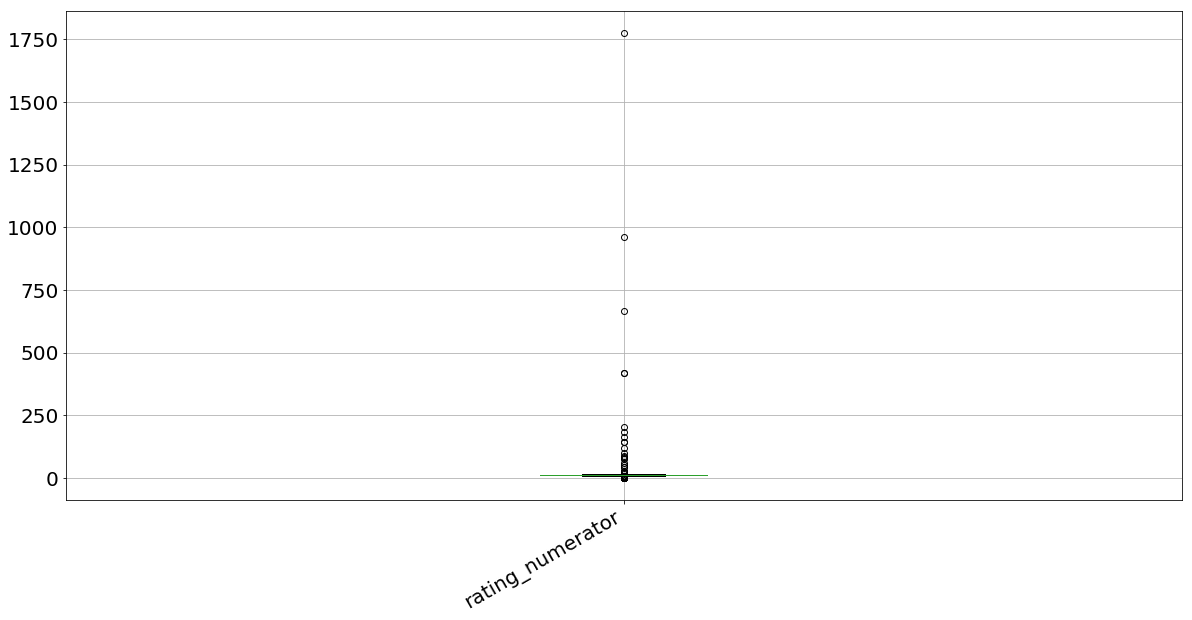

In [270]:
# box plot pour les colonnes favourite et retweet
fig, axs = plt.subplots(1,1,figsize=(20,  10)); 
df.boxplot(['rating_numerator']);
fig.autofmt_xdate()

- il y a une valeurs aberrantes

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


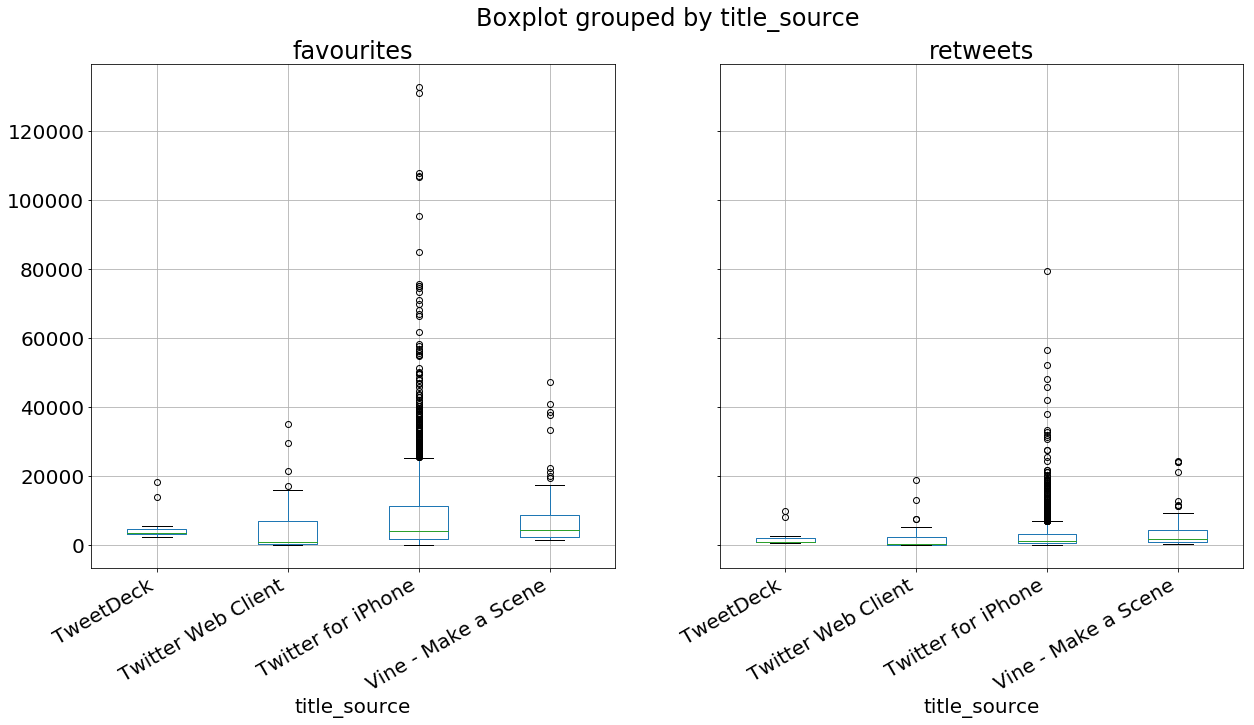

In [271]:
# box plot pour les colonnes favourite et retweet par source
fig, axs = plt.subplots(1,1,figsize=(20,  10)); 
df.boxplot(['favourites', 'retweets'], 'title_source', axs);
fig.autofmt_xdate()

- toutes les colonnes contiennent des valeurs aberrantes

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


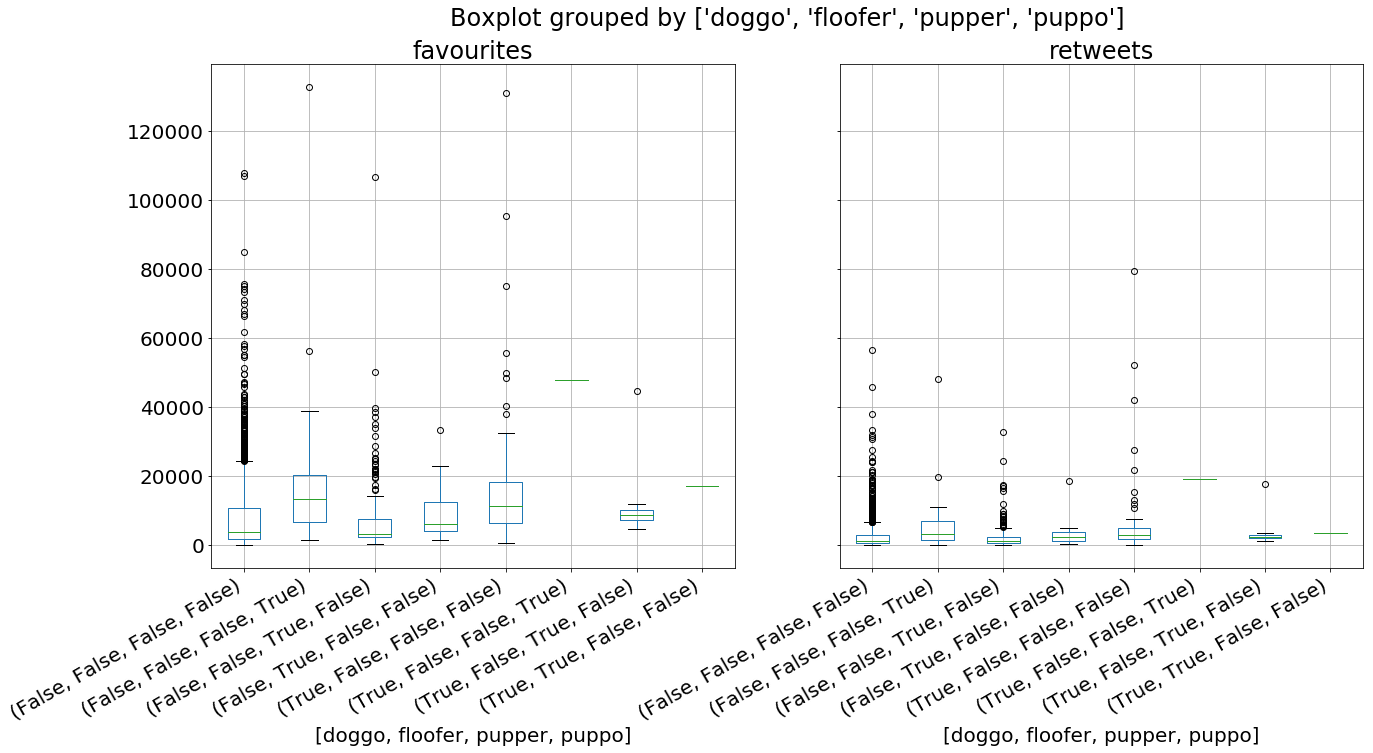

In [272]:
fig, axs = plt.subplots(1,1,figsize=(20,  10));
df.boxplot(['favourites', 'retweets'], ['doggo', 'floofer','pupper','puppo'], axs);
fig.autofmt_xdate()

- la majorite des colonnes contiennent des valeurs aberrantes

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


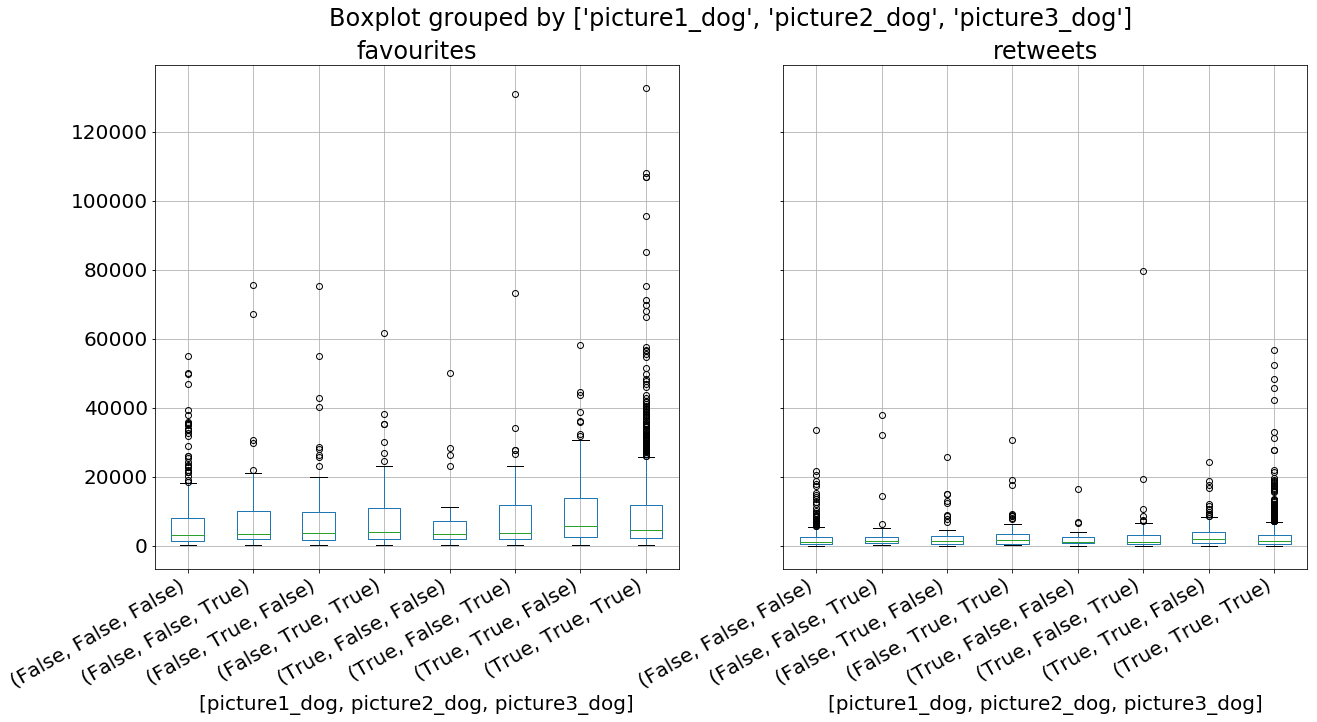

In [273]:
fig, axs = plt.subplots(1,1,figsize=(20,  10));
df.boxplot(['favourites', 'retweets'], ['picture1_dog', 'picture2_dog','picture3_dog'], axs);
fig.autofmt_xdate()

- toutes les colonnes contiennent des valeurs aberrantes

### Evolution de favourites, rating et retweet par le temps

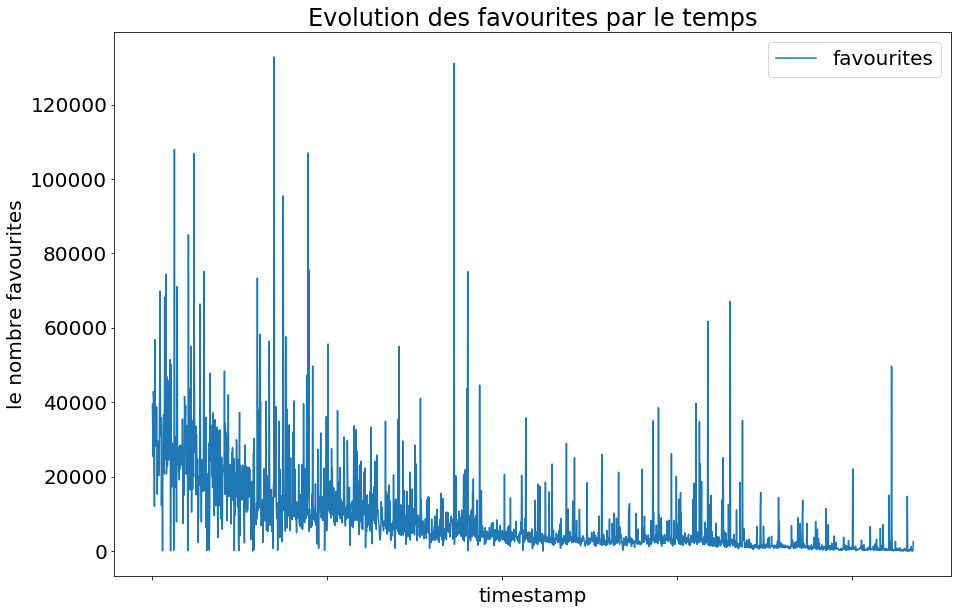

In [274]:
# pour afficher evolution de favourite par le temp
df.plot("timestamp", "favourites", figsize=(15, 10));
plt.ylabel('le nombre favourites');
plt.title('Evolution des favourites par le temps');
plt.savefig('time_retweet.png', bbox_inches='tight')

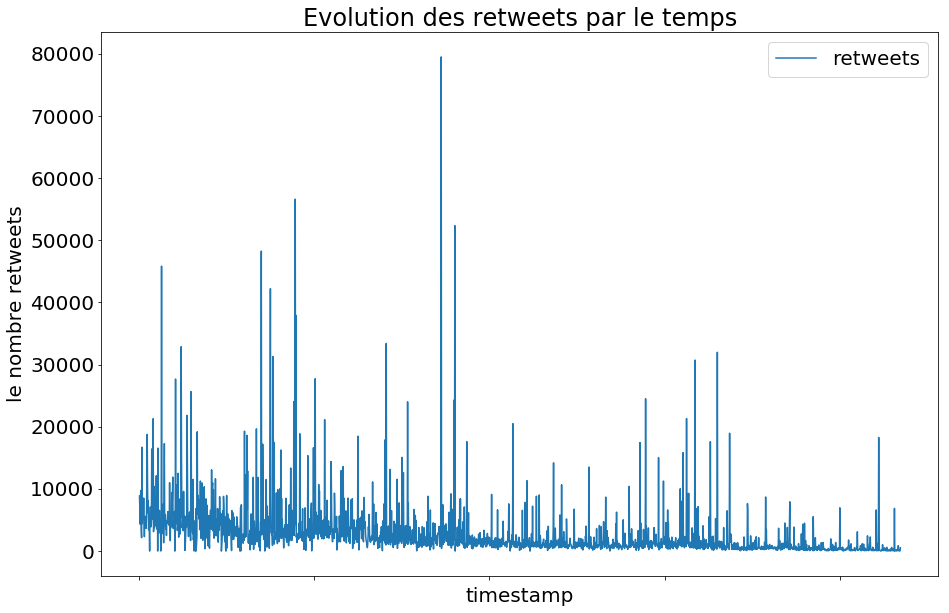

In [275]:
# pour afficher evolution de retweet par le temp
df.plot("timestamp", "retweets", figsize=(15, 10));
plt.ylabel('le nombre retweets');
plt.title('Evolution des retweets par le temps');
plt.savefig('time_favourite.png', bbox_inches='tight')

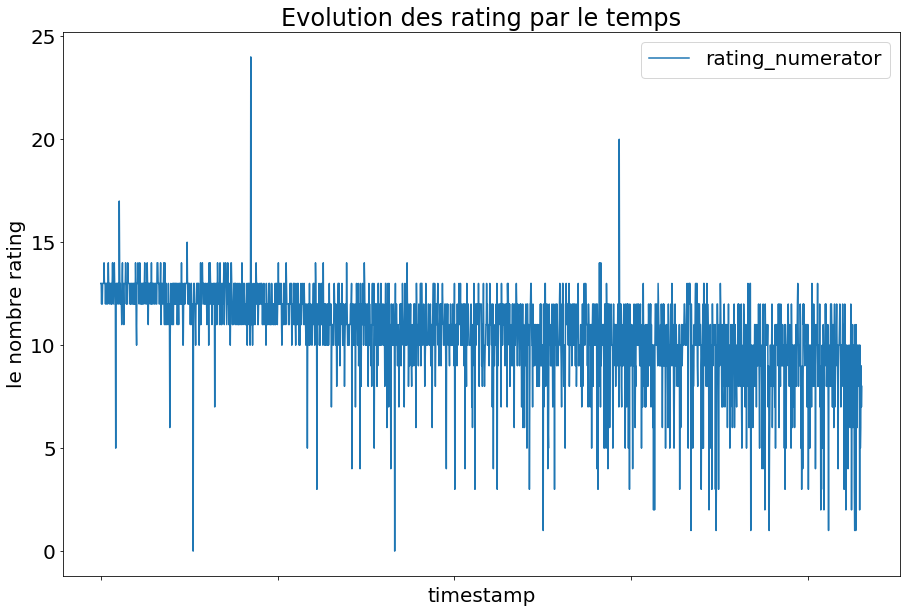

In [276]:
# pour afficher evolution de rating par le temp
q = df_twit_enhanced['rating_numerator'].quantile(0.99)
df.query('rating_numerator < @q').plot("timestamp", "rating_numerator", figsize=(15, 10));
plt.ylabel('le nombre rating');
plt.title('Evolution des rating par le temps');
plt.savefig('time_rating.png', bbox_inches='tight')

### les populaire chiens solen

In [277]:
# on va garder juste les 10 premiers chiens qu'ayant un nombre tres eleves du retweet
df.groupby(by="name")['retweets'].sum().sort_values(ascending=False).head(10)

name
None       1926534
Bo           73800
Stephan      56625
a            53221
Duddles      45849
Buddy        39599
Lucy         36058
quite        34987
Sunny        34686
Jamesy       32883
Name: retweets, dtype: int64

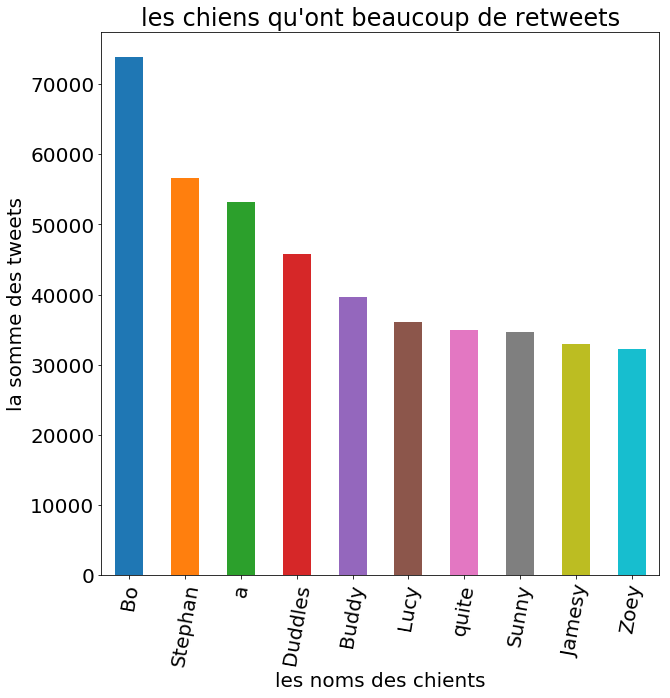

In [278]:
# les chiens qu'ont beaucoup de retweets
plt.figure(figsize=(10,10))
df[df['name'] != 'None'].groupby(by="name")['retweets'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xticks(rotation=80);
plt.xlabel('les noms des chients');
plt.ylabel('la somme des tweets');
plt.title("les chiens qu'ont beaucoup de retweets");
plt.savefig('chiens_retweet.png', bbox_inches='tight')

In [279]:
df_race = df.query('picture1_dog == True & picture2_dog == True & picture3_dog == True')
df_n_race = df.query('picture1_dog == False & picture2_dog == False & picture3_dog == False')

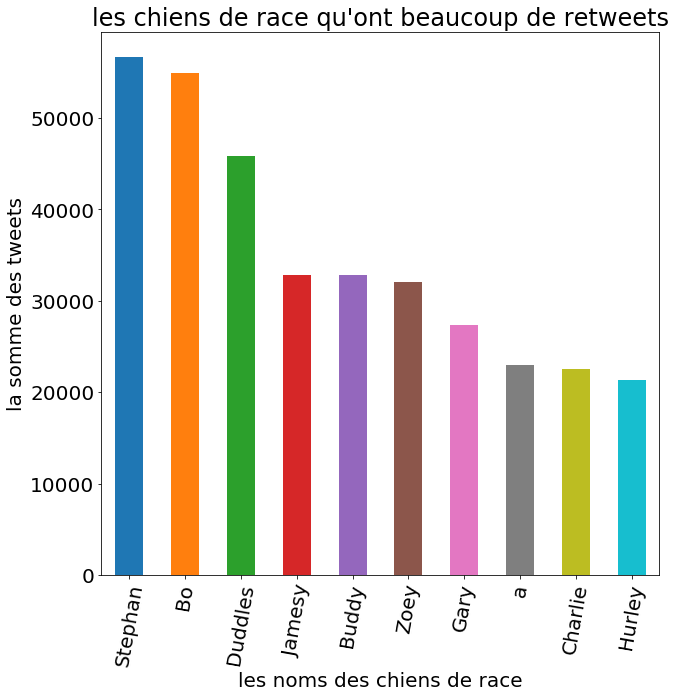

In [280]:
# les chiens de race qu'ont beaucoup de retweets
plt.figure(figsize=(10,10))
df_race[df_race['name'] != 'None'].groupby(by="name")['retweets'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xticks(rotation=80);
plt.xlabel('les noms des chiens de race');
plt.ylabel('la somme des tweets');
plt.title("les chiens de race qu'ont beaucoup de retweets");

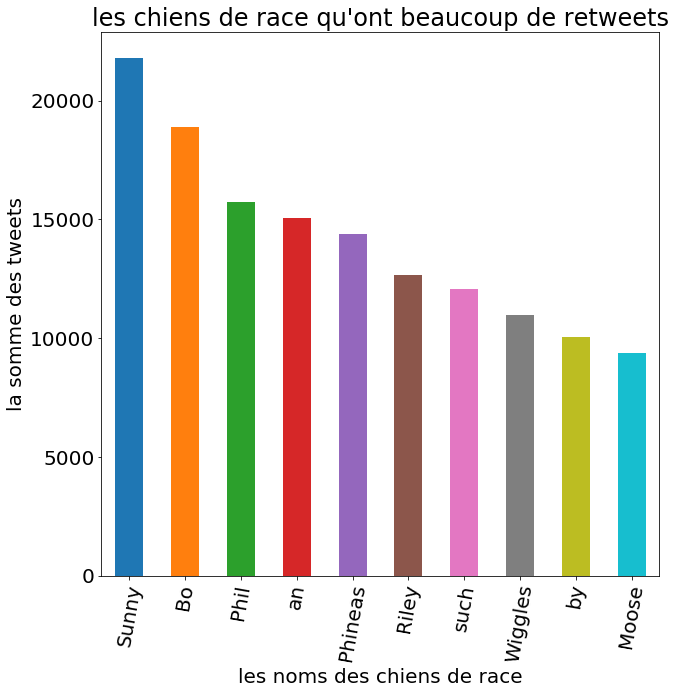

In [281]:
# les chiens de race qu'ont beaucoup de retweets
plt.figure(figsize=(10,10))
df_n_race[df_n_race['name'] != 'None'].groupby(by="name")['retweets'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xticks(rotation=80);
plt.xlabel('les noms des chiens de race');
plt.ylabel('la somme des tweets');
plt.title("les chiens de race qu'ont beaucoup de retweets");

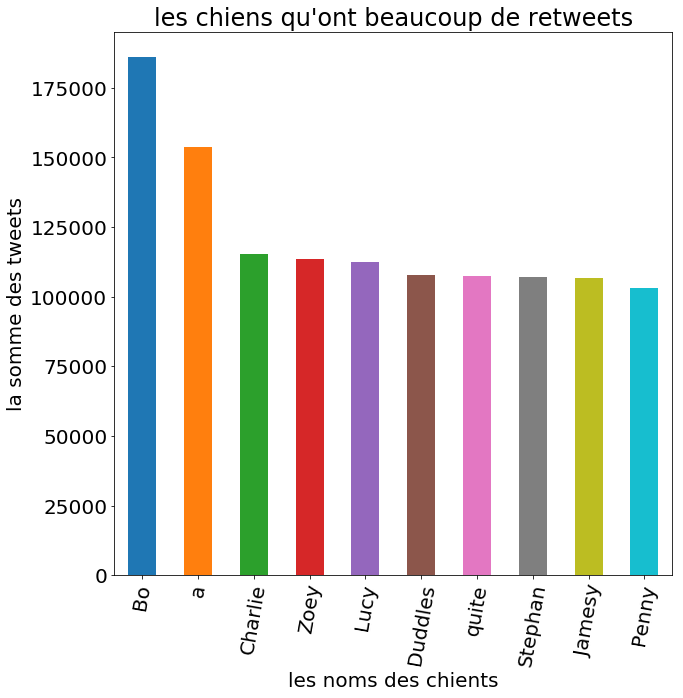

In [282]:
# les chiens qu'ont beaucoup de retweets
plt.figure(figsize=(10,10))
df[df['name'] != 'None'].groupby(by="name")['favourites'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xticks(rotation=80);
plt.xlabel('les noms des chients');
plt.ylabel('la somme des tweets');
plt.title("les chiens qu'ont beaucoup de retweets");

In [283]:
# on va garder les chiens qui ayant un nombre tres grand du retweet et de favourite
dogs_fav = set(df.groupby(by="name")['favourites'].sum().sort_values(ascending=False).head(10).index)
dogs_twe = set(df.groupby(by="name")['retweets'].sum().sort_values(ascending=False).head(10).index)
dogs_fav.intersection(dogs_twe)

{'Bo', 'Duddles', 'Jamesy', 'Lucy', 'None', 'Stephan', 'a', 'quite'}

In [284]:
# bar char for retweets and favourites 

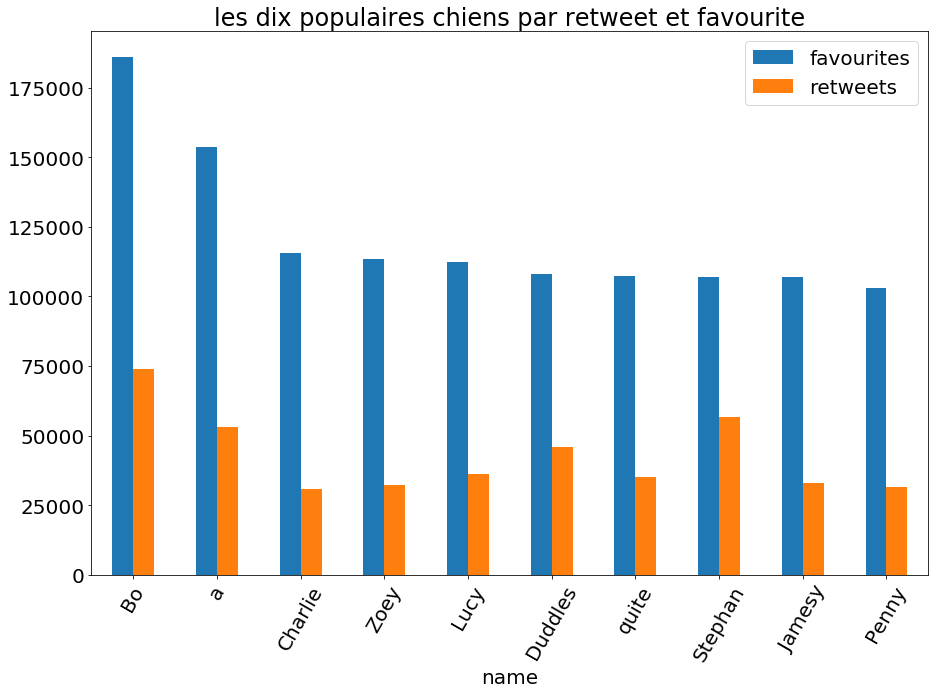

In [285]:
# on va groupe par type 
df[df['name'] != 'None'].groupby('name')[['favourites', 'retweets']].sum().sort_values('favourites', ascending=False).head(10).reset_index().set_index('name').plot(kind='bar', figsize=(15, 10));
plt.xticks(rotation=60);
plt.title('les dix populaires chiens par retweet et favourite');
plt.savefig('sum_retweet_favourite_name_dogs.png', bbox_inches='tight')

In [286]:
# fonction qui accepte 4 paramter du type dict
def get_type_chien(v1, v2, v3, v4):
    if list(v1.values())[0] == True:
        return list(v1)[0]
    if list(v2.values())[0] == True:
        return list(v2)[0]    
    if list(v3.values())[0] == True:
        return list(v3)[0]    
    if list(v4.values())[0] == True:
        return list(v4)[0]
    return None

In [287]:
# on va creer une autre colonne qui contient le type du chien (dggo, flootfer, pupper et puppo)
df['type'] = df.apply(lambda x: get_type_chien({'doggo': x['doggo']}, {'floofer' :x['floofer']}, {'pupper': x['pupper']}, {'puppo':x['puppo']}), axis=1)

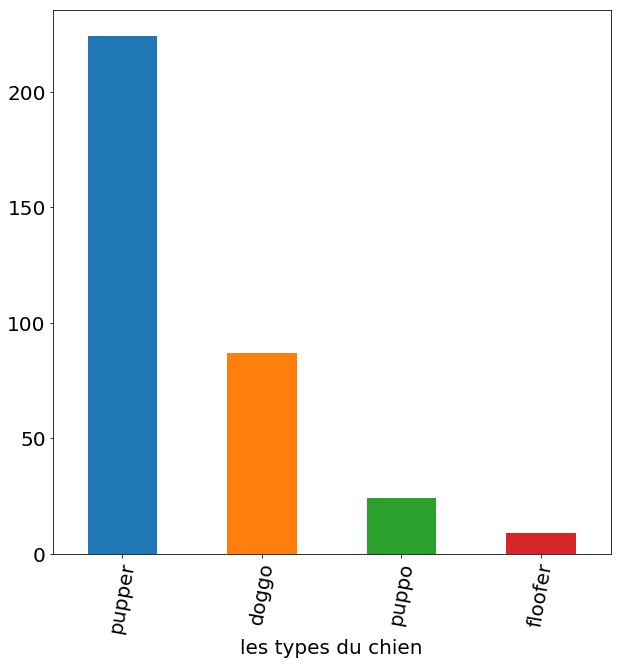

In [288]:
# bar char pour afficher le nombre totale de chaque type du chien
plt.figure(figsize=(10,10));
df.type.value_counts().plot(kind='bar');
plt.xticks(rotation=80);
plt.xlabel('les types du chien');
plt.savefig('type_dogs.png', bbox_inches='tight')

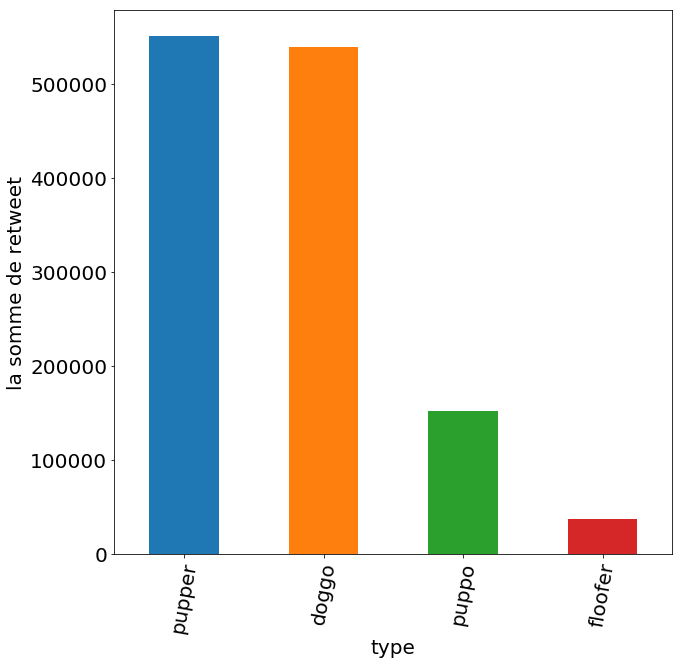

In [289]:
# la somme de retweet par type du chien
plt.figure(figsize=(10,10));
df.groupby('type')['retweets'].sum().sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=80);
plt.ylabel('la somme de retweet');

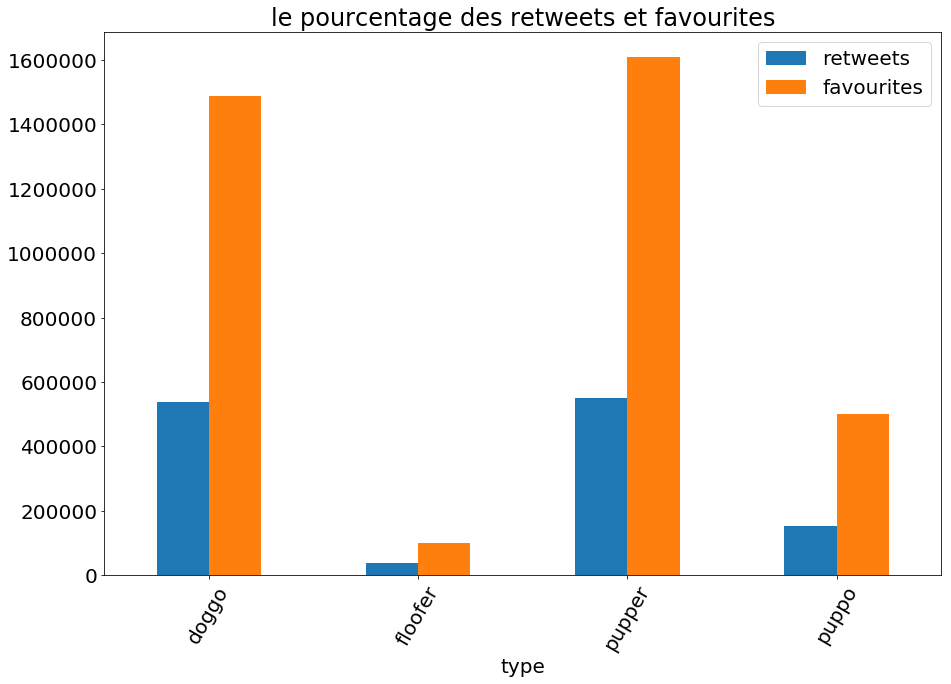

In [290]:
# on va groupe par type 
df.groupby('type')[['retweets', 'favourites']].sum().reset_index().set_index('type').plot(kind='bar', figsize=(15, 10));
plt.xticks(rotation=60);
plt.title('le pourcentage des retweets et favourites');
plt.savefig('sum_retweet_favourite_type_dogs1.png', bbox_inches='tight')

- on peut voir que les deux type Pupper et Doggo ont beacoup de favourites

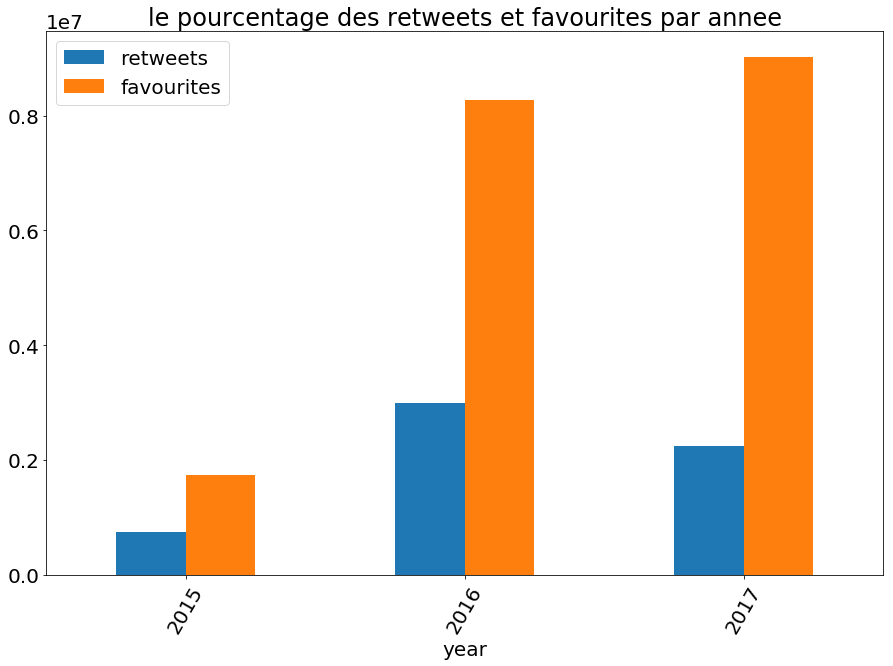

In [291]:
df.groupby('year')[['retweets', 'favourites']].sum().reset_index().set_index('year').plot(kind='bar', figsize=(15, 10));
plt.xticks(rotation=60);
plt.title('le pourcentage des retweets et favourites par annee');
plt.savefig('bar_char_fav_ret_par_anne.png', bbox_inches='tight')

- on peut voir que toujours les favourites sont tres elves que les retweet
- et aussi le nombre de favourite et retweet augment rapidment annee par annee

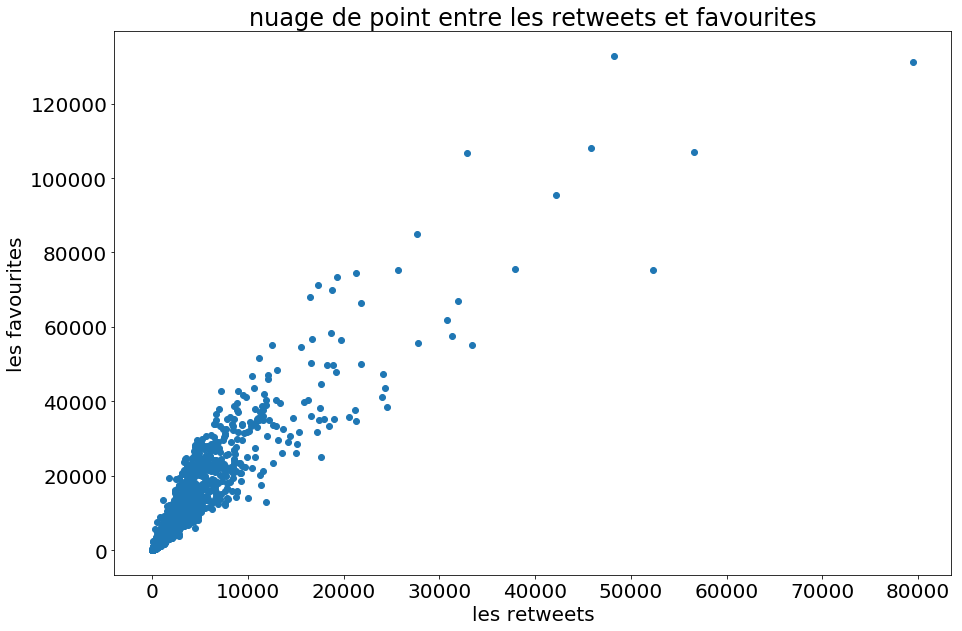

In [294]:
# nuage de point entre les retweets et favourites
plt.figure(figsize=(15, 10))
plt.scatter(df.retweets, df.favourites);
plt.ylabel('les favourites')
plt.xlabel('les retweets')
plt.title('nuage de point entre les retweets et favourites');
plt.savefig('rela_retweet_favou.png', bbox_inches='tight')

- on peut voir une relation linéaire entre les retweets et les favourites


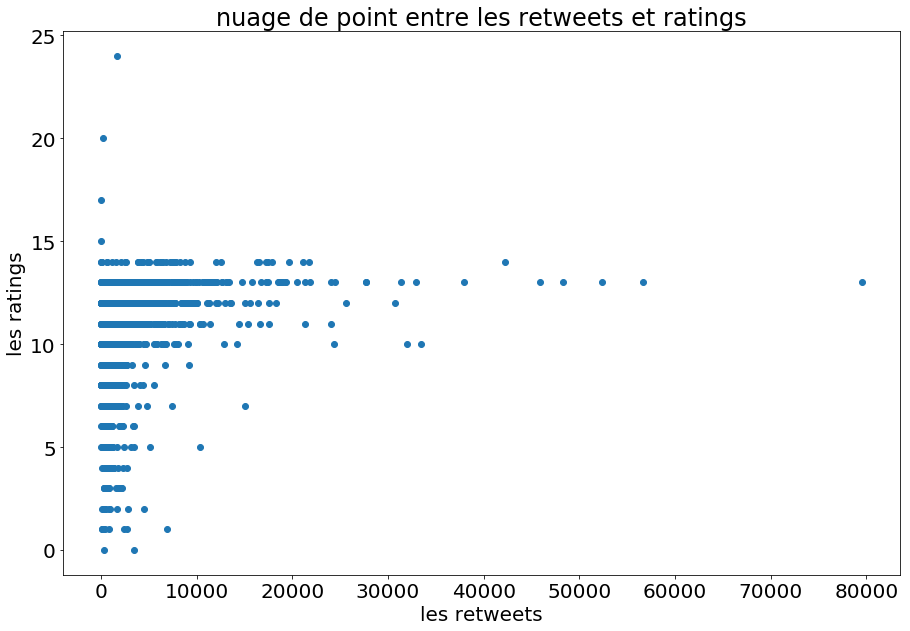

In [295]:
# nuage de point entre les retweets et favourites
df_rating = df.query('rating_numerator < @q')
plt.figure(figsize=(15, 10))
plt.scatter(df_rating.retweets, df_rating.rating_numerator);
plt.ylabel('les ratings')
plt.xlabel('les retweets')
plt.title('nuage de point entre les retweets et ratings');
plt.savefig('rela_retweet_rating.png', bbox_inches='tight')

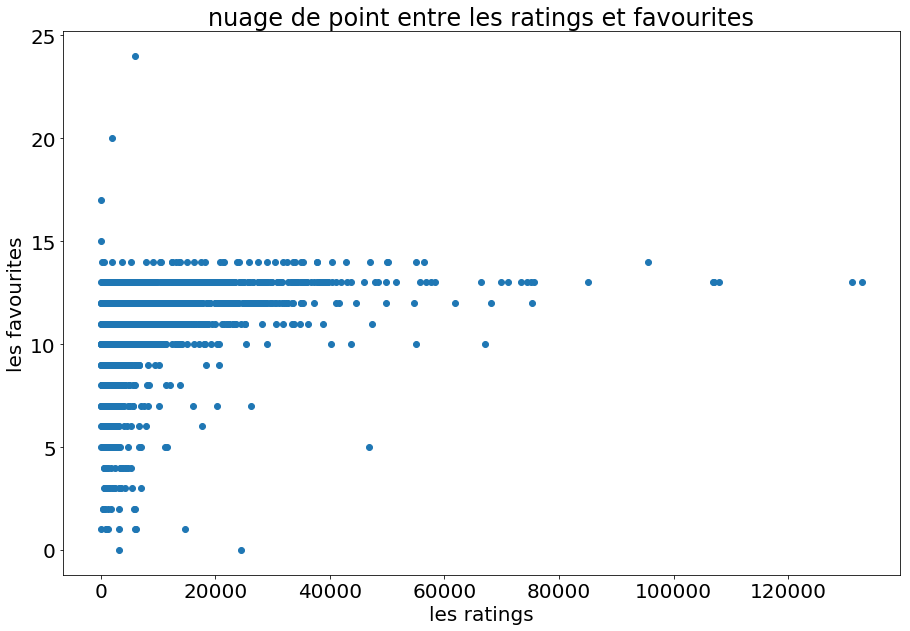

In [296]:
# nuage de point entre les retweets et favourites
plt.figure(figsize=(15, 10))
plt.scatter(df_rating.favourites, df_rating.rating_numerator);
plt.ylabel('les favourites')
plt.xlabel('les ratings')
plt.title('nuage de point entre les ratings et favourites');
plt.savefig('rela_rating_favou.png', bbox_inches='tight')

In [297]:
### Save Data set finale

In [298]:
twitter_archive_master.to_csv('twitter_archive_master_clean.csv', index=False)